<h1>MADSAD2017: Predicting Credit Risk</h1>
<h2>Juan Francisco Espinosa Maya</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train.csv',index_col='ID')
data

,DATA_CONSULTA,OPERACAO,VP67,VP119,VP134,VP135,VP142,VP153,VP157,VPCMS0008,...,VPDCS0050,VP169,VPGEO0040,VPDCR0027,VP176,VP184,IND_BOM,VP59_146,VP144_C,CLIENT_ID
ID,,,,,,,,,,,,,,,,,,,,,
1,23/07/2016,1,0,80,-1,37,50,3,1,0,...,95,0,112,70,31,1,0,-2,0,1
2,06/08/2016,2,1,100,645,47,100,2,2,2440,...,12,0,392,65,64,0,1,0,0,2
3,24/03/2016,1,0,100,448,5,-3,3,0,0,...,15,0,331,65,67,0,1,0,0,3
4,06/04/2016,1,1,-2,-1,59,-1,0,-1,1496,...,23,0,355,71,0,0,1,-3,-99,4
5,09/09/2016,2,0,100,700,13,-1,1,0,4213,...,25,0,301,65,73,6,1,-1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,06/01/2016,2,0,-1,-1,255,-1,0,-1,1098,...,39,0,308,65,0,12,1,-1,0,338043
349997,05/09/2016,2,0,-1,762,255,-1,0,-1,1576,...,46,0,296,65,0,2,1,-1,0,338044
349998,23/06/2016,2,0,-1,762,255,-1,0,-1,1576,...,46,0,304,65,0,2,1,-1,0,338044


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350000 entries, 1 to 350000
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   DATA_CONSULTA  350000 non-null  object
 1   OPERACAO       350000 non-null  int64 
 2   VP67           350000 non-null  int64 
 3   VP119          350000 non-null  int64 
 4   VP134          350000 non-null  int64 
 5   VP135          350000 non-null  int64 
 6   VP142          350000 non-null  int64 
 7   VP153          350000 non-null  int64 
 8   VP157          350000 non-null  int64 
 9   VPCMS0008      350000 non-null  int64 
 10  VPCMS0010      350000 non-null  int64 
 11  VPDCS0037      350000 non-null  int64 
 12  VPDCS0050      350000 non-null  int64 
 13  VP169          350000 non-null  int64 
 14  VPGEO0040      350000 non-null  int64 
 15  VPDCR0027      350000 non-null  int64 
 16  VP176          350000 non-null  int64 
 17  VP184          350000 non-null  int64 
 18  IND_BOM  

<h3>Set new feature names:</h3>

<table border="1" cellpadding="6" cellspacing="0">
<thead>
<tr>
<th>Name</th>
<th>What it means (simple explanation)</th>
<th>Comments / Special cases</th>
</tr>
</thead>
<tbody>

<tr>
<td>DATA_CONSULTA</td>
<td>Date on which the CPF query was performed.</td>
<td>CPF is the tax identification number.</td>
</tr>

<tr>
<td>OPERACAO</td>
<td>Product or service that performed the query.</td>
<td></td>
</tr>

<tr>
<td>VP67</td>
<td>Number of SCPC debts removed due to expiration in the last 3 years.</td>
<td>0 = No debts were removed due to expiration.</td>
</tr>

<tr>
<td>VP119</td>
<td>Percentage of paid debts over debts registered in the last 3 years.</td>
<td>-3: No new debts but some paid;<br>-2: Expiration only;<br>-1: No new debts.</td>
</tr>

<tr>
<td>VP134</td>
<td>Lowest score among the companies in which the CPF participates.</td>
<td>-1: Does not participate in any company.</td>
</tr>

<tr>
<td>VP135</td>
<td>Longest time a debt remained negative before being removed.</td>
<td>-1: Only active debts;<br>255: No debts to analyze.</td>
</tr>

<tr>
<td>VP142</td>
<td>Percentage of paid debts over those registered in the last 6 months.</td>
<td>-3: No new debts but with old payments;<br>-2: Expiration only;<br>-1: No registered debts.</td>
</tr>

<tr>
<td>VP153</td>
<td>Number of company types that generated debts in the last year.</td>
<td>0: No debts during the period.</td>
</tr>

<tr>
<td>VP157</td>
<td>Types of companies where the CPF has active debts.</td>
<td>-1: No debts in 5 years;<br>0: No active debts.</td>
</tr>

<tr>
<td>VPCMS0008</td>
<td>Estimated income of the individual.</td>
<td>0: No information available.</td>
</tr>

<tr>
<td>VPCMS0010</td>
<td>Current age of the individual.</td>
<td>255: No age information available.</td>
</tr>

<tr>
<td>VPDCS0037</td>
<td>Percentage of households with a single electricity meter in the area.</td>
<td>-3: No census tract;<br>-2: Not found;<br>-1: No data.</td>
</tr>

<tr>
<td>VPDCS0050</td>
<td>Percentage of households with income above two minimum wages.</td>
<td>-3: No census tract;<br>-2: Not found;<br>-1: No data.</td>
</tr>

<tr>
<td>VP169</td>
<td>Indicates whether the CPF is new to credit.</td>
<td>0: Not new;<br>1: New.</td>
</tr>

<tr>
<td>VPGEO0040</td>
<td>Average number of CPFs with active debts in the region.</td>
<td></td>
</tr>

<tr>
<td>VPDCR0027</td>
<td>Percentage of households with only one bathroom in the area.</td>
<td></td>
</tr>

<tr>
<td>VP176</td>
<td>Age of the person when receiving their first negative debt in the last 3 years.</td>
<td>-1: No date of birth;<br>0: No negative debts.</td>
</tr>

<tr>
<td>VP184</td>
<td>Number of insurance companies that queried the CPF in the last 3 years.</td>
<td>-1: No queries;<br>0: Queries in other segments.</td>
</tr>

<tr>
<td>IND_BOM</td>
<td>Final model label (1 = good payer, 0 = bad payer).</td>
<td></td>
</tr>

<tr>
<td>VP59_146</td>
<td>Number of times CCF debt reoccurred after being cleared.</td>
<td>0: No recurrence;<br>-1: Banked without expiration;<br>-2: Payment since 1999;<br>-3: Unbanked.</td>
</tr>

<tr>
<td>VP144_C</td>
<td>Total active CCF debts in the last 5 years.</td>
<td>99: Unbanked and no debt;<br>0: No active debts.</td>
</tr>

<tr>
<td>CLIENT_ID</td>
<td>Unique user ID.</td>
<td></td>
</tr>

</tbody>
</table>


In [4]:
dict_col_names={'VP67':'scpc_caducated_debts','VP119':'%3yr_payeds_debt','VP134':'lwer_comp_score','VP135':'highst_time_pay','VP142':'%8m_payeds_debt',
               'VP153':'1yr_comp_debt','VP157':'comp_type','VPCMS0008':'rent','VPCMS0010':'age','VPDCS0037':'1_energy_meter',
                'VPDCS0050':'%>2_min_slry','VP169':'new_cfp','VPGEO0040':'mean_debt_per_region','VPDCR0027':'%hmes_wbath',
                'VP176':'age_fst_debt','VP184':'3yr_cpf_cons','IND_BOM':'risk','VP59_146':'CCF_dbts_aft_rest','VP144_C':'5yrs_dbts_CCF'}

In [5]:
special_cols={'%3yr_payeds_debt':[-3,-2,-1], 'lwer_comp_score':[-1], 'highst_time_pay':[255],'comp_type':[0,-1],
             'rent':[0],'age':[255],'1_energy_meter':[-1,-2,-3],'%>2_min_slry':[-1,-2,-3],'age_fst_debt':[0,-1],
              '3yr_cpf_cons':[0,-1],'CCF_dbts_aft_rest':[0,-1,-2,-3],'5yrs_dbts_CCF':[0,99]}

<h2>There are several things to observe in the data.</h2>
<ul>
    <li>'%3yr_payeds_debt' is the percentage of debts; -3, -2, and -1 represent other situations such as no outstanding debt or already paid debts.</li>
    <li>'lwer_comp_score' does not necessarily involve companies; -1 indicates this case.</li>
    <li>'highst_time_pay' does not necessarily have registered debts. The value 255 indicates that there are no registered debts.</li>
    <li>'comp_type': 0 means there are no active debts, and -1 means there have been no debts in the last 5 years.</li>
    <li>'rent': 0 means no information is available.</li>
    <li>'age': 255 means there is no information available.</li>
    <li>'1_energy_meter': -1, -2, and -3 indicate missing data.</li>
    <li>'%&gt;2_min_slry': -1, -2, and -3 indicate that no data is recorded.</li>
    <li>'age_fst_debt': -1 means no data, and 0 means no negative debts.</li>
    <li>'3yr_cpf_cons': -1 means no data, and 0 means it provides information from other segments.</li>
    <li>'CCF_dbts_aft_rest': 0 means no recurrence; -1 banked without expiration; -2 paid since 1999; -3 unbanked.</li>
    <li>'5yrs_dbts_CCF': -99 means unbanked with no debt, and 0 means no debt.</li>
</ul>


In [6]:
#special_cols=['%3yr_payeds_debt','lwer_comp_score','highst_time_pay','comp_type','rent','age','1_energy_meter','%>2_min_slry',
             #'age_fst_debt','3yr_cpf_cons','CCF_dbts_aft_rest','5yrs_dbts_CCF']

In [7]:
data.rename(columns=dict_col_names,inplace=True)
data

,DATA_CONSULTA,OPERACAO,scpc_caducated_debts,%3yr_payeds_debt,lwer_comp_score,highst_time_pay,%8m_payeds_debt,1yr_comp_debt,comp_type,rent,...,%>2_min_slry,new_cfp,mean_debt_per_region,%hmes_wbath,age_fst_debt,3yr_cpf_cons,risk,CCF_dbts_aft_rest,5yrs_dbts_CCF,CLIENT_ID
ID,,,,,,,,,,,,,,,,,,,,,
1,23/07/2016,1,0,80,-1,37,50,3,1,0,...,95,0,112,70,31,1,0,-2,0,1
2,06/08/2016,2,1,100,645,47,100,2,2,2440,...,12,0,392,65,64,0,1,0,0,2
3,24/03/2016,1,0,100,448,5,-3,3,0,0,...,15,0,331,65,67,0,1,0,0,3
4,06/04/2016,1,1,-2,-1,59,-1,0,-1,1496,...,23,0,355,71,0,0,1,-3,-99,4
5,09/09/2016,2,0,100,700,13,-1,1,0,4213,...,25,0,301,65,73,6,1,-1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349996,06/01/2016,2,0,-1,-1,255,-1,0,-1,1098,...,39,0,308,65,0,12,1,-1,0,338043
349997,05/09/2016,2,0,-1,762,255,-1,0,-1,1576,...,46,0,296,65,0,2,1,-1,0,338044
349998,23/06/2016,2,0,-1,762,255,-1,0,-1,1576,...,46,0,304,65,0,2,1,-1,0,338044


<h3>Change the Client ID to the total client transactions</h3>

In [8]:
data['CLIENT_OPERATIONS']=data.groupby('CLIENT_ID')['CLIENT_ID'].transform('count')
data.drop(columns='CLIENT_ID',inplace=True)

In [9]:
data['DATA_CONSULTA']=pd.to_datetime(data['DATA_CONSULTA'],dayfirst=True)
data['DATA_CONSULTA']=data['DATA_CONSULTA'].astype("int64") // 10**9

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350000 entries, 1 to 350000
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   DATA_CONSULTA         350000 non-null  int64
 1   OPERACAO              350000 non-null  int64
 2   scpc_caducated_debts  350000 non-null  int64
 3   %3yr_payeds_debt      350000 non-null  int64
 4   lwer_comp_score       350000 non-null  int64
 5   highst_time_pay       350000 non-null  int64
 6   %8m_payeds_debt       350000 non-null  int64
 7   1yr_comp_debt         350000 non-null  int64
 8   comp_type             350000 non-null  int64
 9   rent                  350000 non-null  int64
 10  age                   350000 non-null  int64
 11  1_energy_meter        350000 non-null  int64
 12  %>2_min_slry          350000 non-null  int64
 13  new_cfp               350000 non-null  int64
 14  mean_debt_per_region  350000 non-null  int64
 15  %hmes_wbath           350000 non-null  

<h2>There is some features that can indicate client different status, like previous debts.</h2>

Different distribution cols between 0 and 1 risk(p < 0.05):
['DATA_CONSULTA', 'OPERACAO', 'scpc_caducated_debts', '%3yr_payeds_debt', 'lwer_comp_score', 'highst_time_pay', '%8m_payeds_debt', '1yr_comp_debt', 'comp_type', 'rent', 'age', '1_energy_meter', '%>2_min_slry', 'new_cfp', 'mean_debt_per_region', '%hmes_wbath', 'age_fst_debt', '3yr_cpf_cons', 'CCF_dbts_aft_rest', '5yrs_dbts_CCF']

 No evidence for be different between 0 and 1 risk(p ≥ 0.05):
['CLIENT_OPERATIONS']

Top 10 columnas más diferentes según KS:
                       ks_stat  p_value
comp_type             0.248054      0.0
OPERACAO              0.218639      0.0
highst_time_pay       0.168401      0.0
age_fst_debt          0.153959      0.0
%3yr_payeds_debt      0.139183      0.0
1yr_comp_debt         0.122150      0.0
scpc_caducated_debts  0.104058      0.0
mean_debt_per_region  0.091266      0.0
rent                  0.088799      0.0
%>2_min_slry          0.085341      0.0


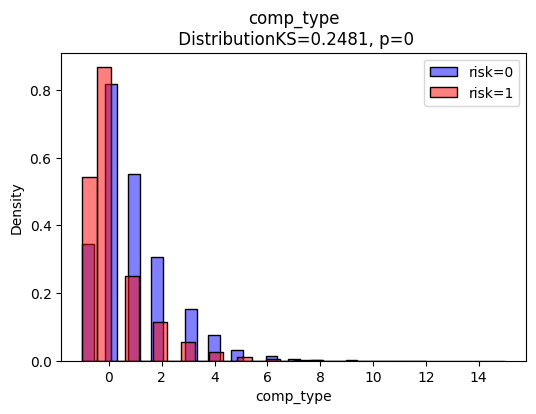

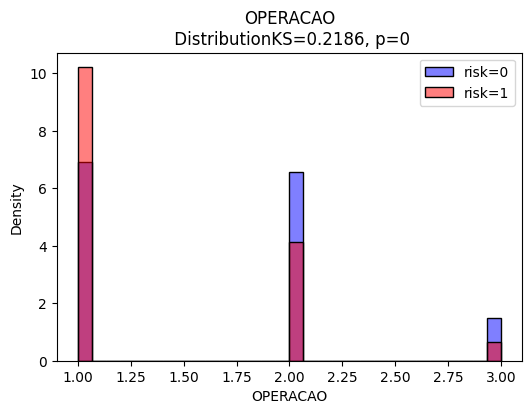

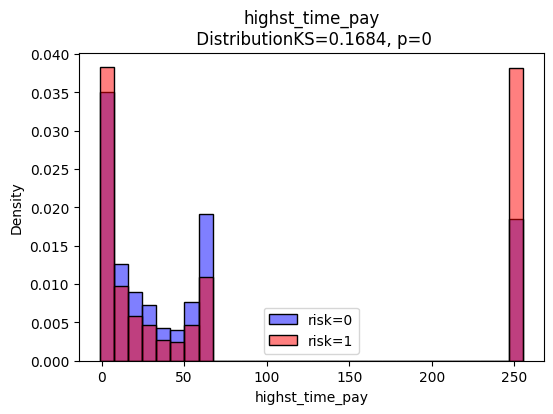

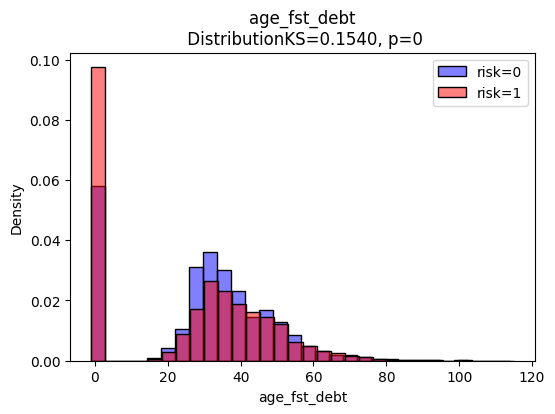

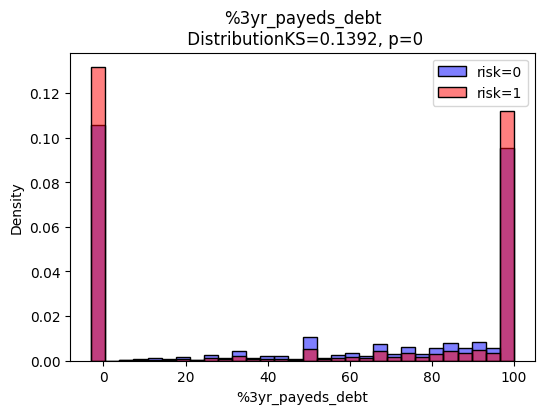

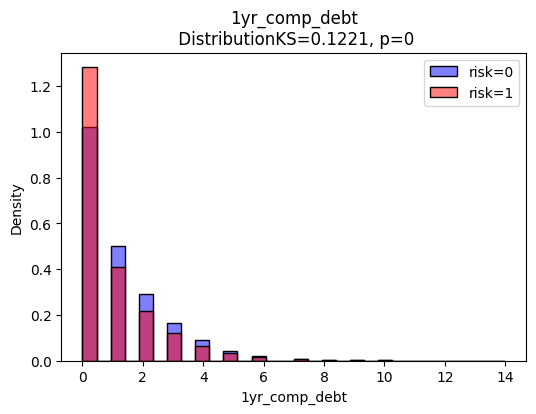

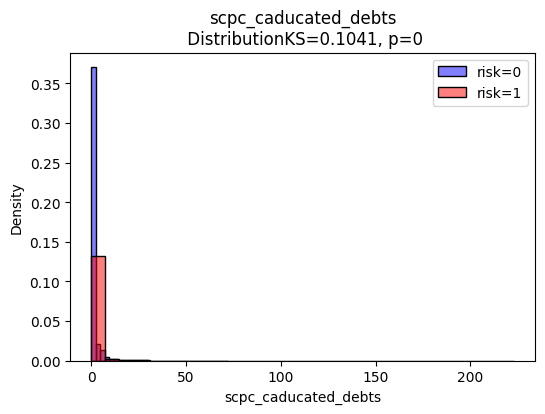

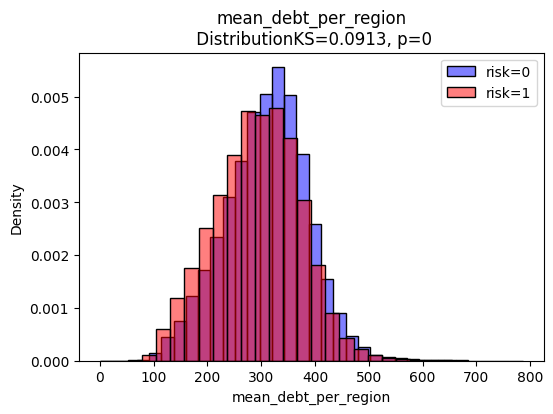

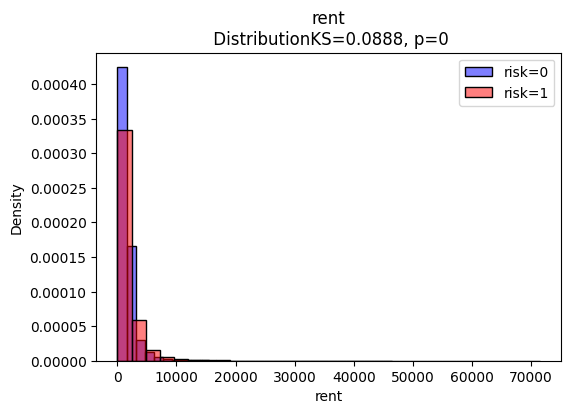

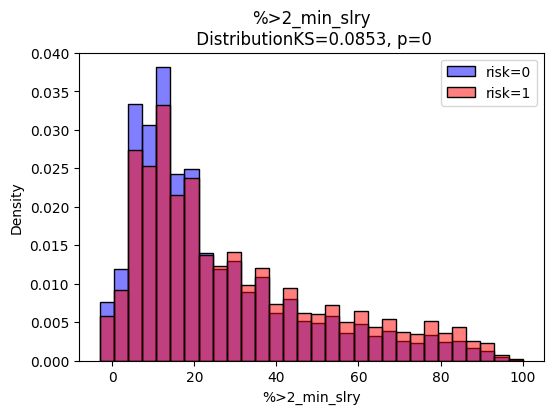

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import pandas as pd

alpha = 0.05 


ks_results = {}

different_cols = []
similar_cols = []

for i in data.columns:
    if i == 'risk':
        continue

    group0 = data[data['risk'] == 0][i].dropna()
    group1 = data[data['risk'] == 1][i].dropna()

    if pd.api.types.is_numeric_dtype(data[i]):
        ks_stat, p_value = ks_2samp(group0, group1)

        ks_results[i] = {
            'ks_stat': ks_stat,
            'p_value': p_value
        }

        # Clasificación según p-value
        if p_value < alpha:
            different_cols.append(i)
        else:
            similar_cols.append(i)

ks_df = pd.DataFrame(ks_results).T
ks_df = ks_df.sort_values(by='ks_stat', ascending=False)

print("Different distribution cols between 0 and 1 risk(p < 0.05):")
print(different_cols)

print("\n No evidence for be different between 0 and 1 risk(p ≥ 0.05):")
print(similar_cols)

# Mostrar top N columnas más diferentes
top_n = 10
top_ks = ks_df[ks_df['p_value'] < alpha].head(top_n)

print(f"\nTop {top_n} columnas más diferentes según KS:")
print(top_ks)

# Histogramas
for col in top_ks.index:
    group0 = data[data['risk'] == 0][col].dropna()
    group1 = data[data['risk'] == 1][col].dropna()
    
    plt.figure(figsize=(6,4))
    sns.histplot(group0, color='blue', alpha=0.5, stat='density', bins=30, label='risk=0')
    sns.histplot(group1, color='red', alpha=0.5, stat='density', bins=30, label='risk=1')
    plt.title(
        f'{col}\n Distribution'
        f'KS={ks_df.loc[col, "ks_stat"]:.4f}, p={ks_df.loc[col, "p_value"]:.4g}'
    )
    plt.legend()
    plt.show()


<h3>For a risk problem, we use the iv and woe feature selector:</h3>

In [12]:
   
def calculate_bin_and_iv_df(df,target,bins=None):
    df_bins=pd.DataFrame(index=df.index)
    df_iv=pd.DataFrame()
    
    #all_woe=pd.DataFrame()
    for col in df.drop(columns=target).columns:
        if bins != None:
            df_bins[col+'_bin']=make_bins(col,df,bins)
            iv=calculate_woe_and_iv(df_bins[col+'_bin'],df[target])
            n_bins=bins
        else:
            df_bins[col+'_bin'],iv,n_bins=evaluate_bin_iv(col,df,target)
            
        iv=calculate_woe_and_iv(df_bins[col+'_bin'],df[target])
        df_iv=pd.concat([df_iv,pd.DataFrame(index=[col+'_bin'],columns=['IV','n_bins'],data=[[iv,n_bins]])])


    return df_iv.sort_values(by='IV',ascending=False),df_bins.join(df[target],how='left')

def make_bins(col,df,bins):
    if data[col].dtype.kind in 'bifc' and data[col].nunique() > bins:
        return pd.qcut(df[col],q=bins,duplicates='drop')
    else:
        return df[col]
            
def calculate_woe_and_iv(df_bins_col,target_column):
    pos_events=df_bins_col[target_column==1].value_counts()
    porcentage_pos_events=np.maximum(pos_events,0.5) / pos_events.sum()
    
    neg_events=df_bins_col[target_column==0].value_counts()
    porcentage_neg_events=np.maximum(neg_events,0.5) / neg_events.sum()

    woe= np.log(porcentage_neg_events/porcentage_pos_events)
    iv=woe*(porcentage_neg_events-porcentage_pos_events)
    
    return iv.sum()

<h3>For maximize the iv importance, we change the bins in order to get the best iv score</h3>

In [13]:
from joblib import Parallel, delayed
import numpy as np
def _evaluate_single_bins(col, df, target, bins):
    binned_col = make_bins(col, df, bins)

    # Validar tamaño mínimo de bins
    if (binned_col.value_counts(normalize=True) < 0.05).any():
        return None

    iv = calculate_woe_and_iv(binned_col, df[target])
    return bins, iv, binned_col
def evaluate_bin_iv(col, df, target, n_jobs=-1):
    values = df[col]
    max_bins = values.nunique()

    if max_bins <= 9:
        iv = calculate_woe_and_iv(values, df[target])
        return values, iv, 0

    bins_range = range(1, max_bins // 5)

    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(_evaluate_single_bins)(col, df, target, bins)
        for bins in bins_range
    )

    # Filtrar resultados inválidos
    results = [r for r in results if r is not None]

    if not results:
        return None, None, None

    # Seleccionar mejor IV
    best_bins, best_iv, best_binned_col = max(results, key=lambda x: x[1])

    return best_binned_col, best_iv, best_bins


In [14]:
calculate_bin_and_iv_df(data,'risk',bins=None)[0]

,IV,n_bins
comp_type_bin,0.271544,2
%3yr_payeds_debt_bin,0.254405,16
highst_time_pay_bin,0.224751,12
OPERACAO_bin,0.207203,0
age_fst_debt_bin,0.136426,15
%8m_payeds_debt_bin,0.086392,10
lwer_comp_score_bin,0.061899,17
mean_debt_per_region_bin,0.048569,18
rent_bin,0.046966,19
scpc_caducated_debts_bin,0.043598,7


<h3>After the feature iv and the distribution comparative, it seems like the 'highst_time_pay' is crucial to determinate the risk status. Futhermore, the 255 value in 'highst_time_pay' acording to the metadata, implies a different type of client which never had a previous debt. The next cell shows that many columns dont givve information to this type of client.</h3>

In [15]:
for i in data[data['highst_time_pay']==255].columns:
    print(i,len(data[data['highst_time_pay']==255][i].value_counts()))

DATA_CONSULTA 274
OPERACAO 3
scpc_caducated_debts 1
%3yr_payeds_debt 1
lwer_comp_score 500
highst_time_pay 1
%8m_payeds_debt 1
1yr_comp_debt 1
comp_type 2
rent 9640
age 96
1_energy_meter 104
%>2_min_slry 104
new_cfp 2
mean_debt_per_region 529
%hmes_wbath 7
age_fst_debt 1
3yr_cpf_cons 28
risk 2
CCF_dbts_aft_rest 5
5yrs_dbts_CCF 27
CLIENT_OPERATIONS 5


<h3>The previous conclusion guide us to split the data. The next functions make the splits and fill the missing data.</h3>

In [16]:
def split_data_by_col(data,cols_and_values,splits=None,drop=True):
    if splits==None:
        splits=[]
    col=list(cols_and_values.keys())[0]
    values=cols_and_values.pop(col)

    if type(values)==list:
        split_1=data[data[col].isin(values)]
        split_2=data[~data[col].isin(values)]
    else:
        split_1=data[data[col]<values]
        split_2=data[data[col]>=values]

        
    if len(cols_and_values)!=0:
        cols_and_values_copy=cols_and_values.copy()
        split_1=split_data_by_col(split_1.drop(columns=col),cols_and_values,splits)
        split_2=split_data_by_col(split_2.drop(columns=col),cols_and_values_copy,splits)
    else:
        if drop == True:
            splits.append(drop_useless_features(split_1))
            splits.append(drop_useless_features(split_2))
        else:
            splits.append(split_1)
            splits.append(split_2)
    return splits 
        

def drop_useless_features(data):
    useless_features=[]
    for col in data.columns:
        if len(data[col].value_counts())==1:
            useless_features.append(col)
    if len(useless_features)==0:
        return data
    else:
        return data.drop(columns=useless_features)
        
def make_dict_splits(data,cols_and_values,drop=True):
    splits=split_data_by_col(data,cols_and_values,drop=drop)
    splits_copy=[]
    for df in splits:
        if df.shape[0]!=0:
            splits_copy.append(df)
    return dict(zip(range(len(splits_copy)),splits_copy))

In [17]:
from scipy.stats import ks_2samp
from itertools import combinations

def compare_distributions_and_fill_data(split_data_by_dict,miss_values_per_col):
    original_data_frames_dict,copy_data_frames_dict=copy_and_original_dict(split_data_by_dict)
    replace_values={}

    
    for col,miss_val in miss_values_per_col.items():
        replace_col_val={}
        
        for i, df1 in original_data_frames_dict.items():
            df1_copy=copy_data_frames_dict[i].copy()
            equal_distributions=[df1]
            try:
                distributrion_df1=df1[col][~df1[col].isin(miss_val)]
            except:
                continue
                
            for j, df2 in original_data_frames_dict.items():
                try:
                    distribution_df2=df2[col][~df2[col].isin(miss_val)]
                except:
                    continue
                _, confident=ks_2samp(distributrion_df1, distribution_df2)
                if confident>0.05 and i != j:

                    equal_distributions.append(distribution_df2)

            if len(equal_distributions)>0:
                new_value=pd.concat(equal_distributions)[col].mean()
                
            else: 
                new_value=distributrion_df1.mean()

            new_value=int(new_value)
            replace_col_val[i]=new_value
            
            df1_copy.replace({col: miss_val},new_value, inplace=True)

            copy_data_frames_dict[i]=df1_copy
            
        replace_values[col]=replace_col_val
                
    return copy_data_frames_dict, replace_values



def copy_and_original_dict(split_data_by_dict):
    copy={}
    original={}
    for i,df in split_data_by_dict.items():
        original[i]=df
        copy[i]=df.copy()
    return original,copy

<h3>We are going top use dictionaries to identify the data splits, and we will continue with this way to organize data</h3>

In [18]:
def get_strong_features(df,target,bins=None):
    iv_rank,new_df=calculate_bin_and_iv_df(df,target,bins)
    new_df=new_df[iv_rank[iv_rank['IV']>0.02].index.values]
    new_df_cols=list(new_df.columns.str[:-4])
    new_df_cols.append('risk')

    new_df['risk']=df['risk']

    return iv_rank,encode_df_iv(new_df),new_df,df[new_df_cols]

def encode_df_iv(df_iv):
    encoded_df=df_iv.copy()
    for col in df_iv.select_dtypes(include=["category"]).columns:
        encoded_df[col]=encoded_df[col].cat.codes
    return encoded_df

def make_dict_splits_data_iv(splits_dict,target,bins=None):
    splits_data_iv={}
    for i,split in splits_dict.items():
        splits_data_iv[i]=get_strong_features(split,target,bins)

    return splits_data_iv

<h3>Prepare the data:</h3>

In [19]:
split_data_by_dict=make_dict_splits(data,{'highst_time_pay': [255],'lwer_comp_score': [-1]})
split_data_depured, replace_values=compare_distributions_and_fill_data(split_data_by_dict,{'rent': [0],
                                                                                           'age': [255],
                                                                                           '1_energy_meter': [-1, -2, -3], 
                                                                                           '%>2_min_slry': [-1, -2, -3],'3yr_cpf_cons': [-1],
                                                                                              'age_fst_debt': [-1]})
splits_data_iv=make_dict_splits_data_iv(split_data_depured,target='risk')

In [20]:
splits_data_iv[1][2]

,OPERACAO_bin,lwer_comp_score_bin,risk
ID,,,
10,1,"(641.0, 688.0]",0
12,1,"(832.0, 843.0]",1
13,1,"(843.0, 858.0]",1
31,1,"(858.0, 913.0]",1
42,1,"(762.0, 773.0]",1
...,...,...,...
349843,1,"(762.0, 773.0]",1
349907,1,"(820.0, 832.0]",1
349977,1,"(746.0, 762.0]",1


In [21]:
def depurate_data(data,replace_values,missing_data,splits):

    dict_data_splits=make_dict_splits(data,cols_and_values=splits,drop=False)

    for col, miss_value in missing_data.items():
        dict_new_col_values=replace_values[col]
        for i,new_val in dict_new_col_values.items():
            dict_data_splits[i].replace({col:miss_value},new_val,inplace=True)
    return dict_data_splits 

def adapt_to_previous_bins(dict_data_splits,splits_data_iv):
    new_splits_data_iv={}
    encode_new_splits_data_iv={}
    for i,df in dict_data_splits.items():
        new_iv_df=pd.DataFrame(index=df.index)
        try:
            new_iv_df['risk']=df['risk']
        except:
            0
        old_iv_df=splits_data_iv[i][2]
        for col in old_iv_df.columns:
            if col=='risk':
                continue
            if old_iv_df[col].dtype.name == 'category':
                bins=old_iv_df[col].cat.categories
                bin_edges=[interval.left for interval in bins] + [bins[-1].right]
                new_iv_df[col] = pd.cut(df[col[:-4]], bins=bin_edges)
            else:
                new_iv_df[col]=df[col[:-4]]

        new_splits_data_iv[i]=new_iv_df
        encode_new_splits_data_iv[i]=encode_df_iv(new_iv_df)
    return encode_new_splits_data_iv

<h3>Once we prepared the data, we will start to train the models.  At first, we see that the category 0 is underepresentated. And for the  we will use a random oversampling, because all features are integers .</h3>

In [25]:
for i,df in split_data_depured.items():
    print(f'The {i} split has {df['risk'].value_counts()}')

The 0 split has risk
1    64910
0     7794
Name: count, dtype: int64
The 1 split has risk
1    26890
0     2952
Name: count, dtype: int64
The 2 split has risk
1    132329
0     41598
Name: count, dtype: int64
The 3 split has risk
1    57613
0    15914
Name: count, dtype: int64


<h3>The next cells show the functions that will train all the splis data</h3>

In [37]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score, recall_score, f1_score, balanced_accuracy_score

def train_dict_splits(dict_data,grids):
    dict_models={}
    for i,df in dict_data.items():
        dict_models[i]=[]
        for grid in grids:
            grid_clone=clone(grid)
            X=df.drop(columns='risk')
            y=df['risk']
            X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)
            grid_clone.fit(X_train, y_train)
            print(grid_clone.best_params_)
            print(grid_clone.best_score_)
            test_cv=grid_clone.predict(X_test)
            print(f'Data frame,{i}:')
            print(f'score_f1: {f1_score(y_test,test_cv)}')
            print(f'accuracy: {accuracy_score(y_test,test_cv)}')
            print(f'recall: {recall_score(y_test,test_cv, pos_label=0)}')
            dict_models[i].append(grid_clone)
    return dict_models

def train_dict_splits_with_pipeline(dict_data,dict_models):
    for i,df in dict_data.items():
        X=df.drop(columns='risk')
        y=df['risk']
        X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)
        dict_models[i][0].fit(X_train, y_train)
        dict_models[i][1].fit(X_train, y_train)
    return dict_models

In [38]:
def ensamble_models(dict_data,dict_models,ensambler):
    dict_ensamblers={}
    for i,df in dict_data.items():
        if type(ensambler)!=dict:
            ensambler_clone=clone(ensambler)
        else:
            ensambler_clone=clone(ensambler[i])
            
        X=df.drop(columns='risk')
        y=df['risk']
        X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)

        df_probas=pd.DataFrame(
        data={
        'model_1_class_0': dict_models[i][0].predict_proba(X_train)[:, 0],
        'model_1_class_1': dict_models[i][0].predict_proba(X_train)[:, 1],
        'model_2_class_0': dict_models[i][1].predict_proba(X_train)[:, 0],
        'model_2_class_1': dict_models[i][1].predict_proba(X_train)[:, 1]})
        df_test=pd.DataFrame(
        data={
        'model_1_class_0': dict_models[i][0].predict_proba(X_test)[:, 0],
        'model_1_class_1': dict_models[i][0].predict_proba(X_test)[:, 1],
        'model_2_class_0': dict_models[i][1].predict_proba(X_test)[:, 0],
        'model_2_class_1': dict_models[i][1].predict_proba(X_test)[:, 1]})
        
        ensambler_clone.fit(df_probas,y_train)
        
        try:
            print(ensambler_clone.best_params_)
        except:
            0
        test_pred=ensambler_clone.predict(df_test)
        try:
            print(ensambler_clone.best_score_)
        except:
            0
        print(f'Data frame,{i}:')
        print(f'score_f1: {f1_score(y_test,test_pred)}')
        print(f'accuracy: {accuracy_score(y_test,test_pred)}')
        print(f'recall: {recall_score(y_test,test_pred, pos_label=0)}')
        dict_ensamblers[i]=ensambler_clone
    return dict_ensamblers

<h3>Since we are going to use only linear models, we will use the binned data and is prepared in the next cell</h3>

In [27]:
data_to_train={}
for i,info in splits_data_iv.items():
    data_to_train[i]=info[1]


<h3>LogisticRegression random search</h3>

In [26]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
# Grid corregido
param_grid_logistic_regression = [
    {
        # RandomOverSampler
        'oversampler__sampling_strategy': [0.362027, 0.31811,0.8328, 0.9109],
        'oversampler__random_state': [42],

        # Logistic Regression - liblinear
        'model__solver': ['liblinear'],
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10],
        'model__max_iter': [500, 1000],
        'model__tol': [1e-4, 1e-3],
        'model__fit_intercept': [True, False],
        'model__intercept_scaling': [1, 5],
        'model__class_weight': ['balanced']
    },
    {
        # RandomOverSampler
        'oversampler__sampling_strategy': [0.362027, 0.31811,0.8328, 0.9109],
        'oversampler__random_state': [42],

        # Logistic Regression - saga
        'model__solver': ['saga'],
        'model__penalty': ['l1', 'l2', 'elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1],
        'model__l1_ratio': [0.25, 0.5, 0.75],
        'model__max_iter': [500, 1000],
        'model__tol': [1e-4, 1e-3],
        'model__fit_intercept': [True],
        'model__n_jobs': [-1],
        'model__warm_start': [True],
        'model__class_weight': ['balanced']
    },
    {
        # RandomOverSampler
        'oversampler__sampling_strategy': [0.362027, 0.31811,0.8328, 0.9109],
        'oversampler__random_state': [42],

        # Logistic Regression - lbfgs / newton-cg
        'model__solver': ['lbfgs', 'newton-cg'],
        'model__penalty': ['l2', 'none'],
        'model__C': [0.001, 0.01, 0.1, 1, 10],
        'model__max_iter': [500, 1000],
        'model__tol': [1e-4, 1e-3],
        'model__class_weight': ['balanced']
    }
]


pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
    ])

grid_logistic_regression = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions= param_grid_logistic_regression ,
    n_iter=2000,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=2)



<h3>Linear SVM random search</h3>

In [27]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV


linear_svc=LinearSVC(max_iter=20000)
calibrated_svc=CalibratedClassifierCV(linear_svc, cv=5)
pipeline = Pipeline(steps=[
    ('oversampler', RandomOverSampler(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', calibrated_svc)
])

param_grid_SVC = {
    'oversampler__sampling_strategy': [0.3, 0.5, 0.7, 0.9, 1.0],
    'model__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__estimator__class_weight': [None, 'balanced'],
    'model__estimator__loss': ['hinge', 'squared_hinge'],  
    'model__estimator__tol': [1e-4, 1e-3, 1e-2]           
}

grid_SVC = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid_SVC,
    scoring='f1',
    n_iter=20,   
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


In [70]:
dict_splits_models=train_dict_splits(data_to_train,[grid_logistic_regression,grid_SVC])

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
{'oversampler__sampling_strategy': 0.31811, 'oversampler__random_state': 42, 'model__warm_start': True, 'model__tol': 0.001, 'model__solver': 'saga', 'model__penalty': 'l1', 'model__n_jobs': -1, 'model__max_iter': 500, 'model__l1_ratio': 0.25, 'model__fit_intercept': True, 'model__class_weight': 'balanced', 'model__C': 0.001}
0.8129118544964641
Data frame,0:
score_f1: 0.8188023848613152
accuracy: 0.7115741695894368
recall: 0.5586914688903143
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'oversampler__sampling_strategy': 0.31811, 'model__estimator__class_weight': 'balanced', 'model__estimator__C': 0.1}
0.9319100507022998
Data frame,0:
score_f1: 0.932205904168521
accuracy: 0.8742865002406988
recall: 0.09300833867864015
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
{'oversampler__sampling_strategy': 0.362027, 'oversampler__random_state': 42, 'model__tol': 0.0001, 'model__solver': 'liblinear

<h3>To avoid searching the hyperparameters, we put the best params here: </h3>

In [40]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

dict_splits_models = {

    0: [
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.31811, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(
                warm_start=True,
                tol=0.001,
                solver="saga",
                penalty="l1",
                n_jobs=-1,
                max_iter=500,
                l1_ratio=0.25,
                fit_intercept=True,
                class_weight="balanced",
                C=0.001
            ))
        ]),
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.31811, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", CalibratedClassifierCV(
                estimator=LinearSVC(
                    class_weight="balanced",
                    C=0.1
                ),
                cv=5
            ))
        ])
    ],

    1: [
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.362027, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(
                tol=0.0001,
                solver="liblinear",
                penalty="l1",
                max_iter=500,
                intercept_scaling=1,
                fit_intercept=True,
                class_weight="balanced",
                C=0.001
            ))
        ]),
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.31811, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", CalibratedClassifierCV(
                estimator=LinearSVC(
                    class_weight="balanced",
                    C=1
                ),
                cv=5
            ))
        ])
    ],

    2: [
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.8328, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(
                tol=0.001,
                solver="lbfgs",
                penalty="l2",
                max_iter=500,
                class_weight="balanced",
                C=0.001
            ))
        ]),
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.31811, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", CalibratedClassifierCV(
                estimator=LinearSVC(
                    class_weight="balanced",
                    C=0.01
                ),
                cv=5
            ))
        ])
    ],

    3: [
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.362027, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", LogisticRegression(
                warm_start=True,
                tol=0.001,
                solver="saga",
                penalty="l1",
                n_jobs=-1,
                max_iter=500,
                l1_ratio=0.5,
                fit_intercept=True,
                class_weight="balanced",
                C=0.001
            ))
        ]),
        Pipeline(steps=[
            ("oversampler", RandomOverSampler(sampling_strategy=0.31811, random_state=42)),
            ("scaler", StandardScaler()),
            ("model", CalibratedClassifierCV(
                estimator=LinearSVC(
                    class_weight="balanced",
                    C=0.01
                ),
                cv=5
            ))
        ])
    ]
}


In [41]:
dict_splits_models=train_dict_splits_with_pipeline(data_to_train,dict_splits_models)

<h3>feature explainer:</h3>
<h3>OPERACAO is a crucial feature to determinate those bad risk in almost every split. The others change between splits</h3>

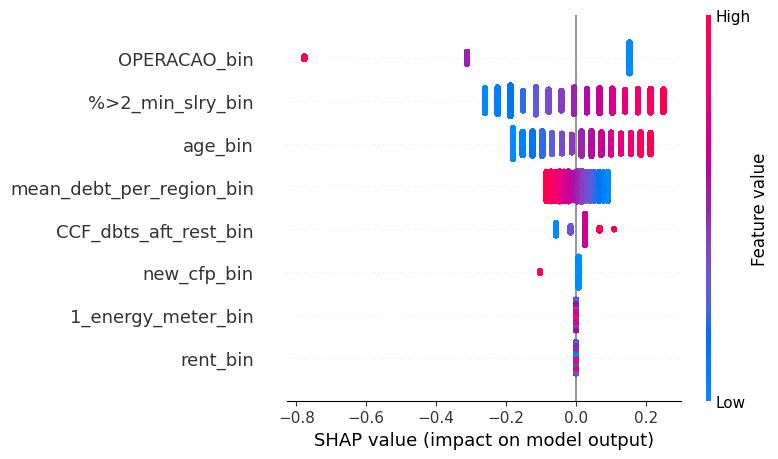

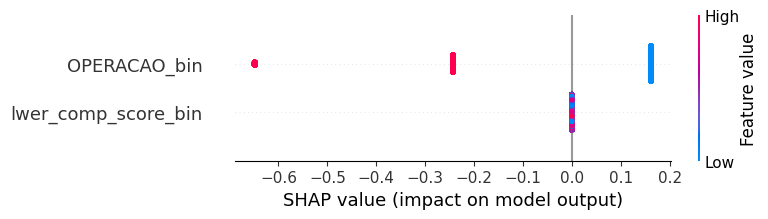

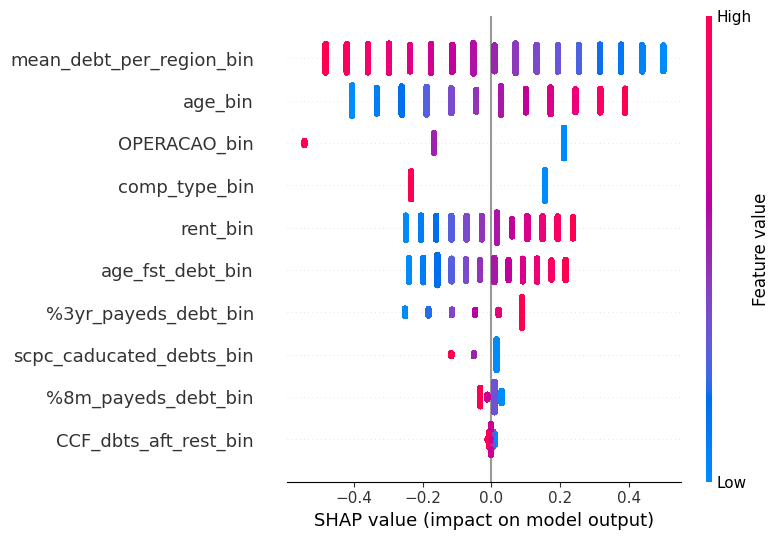

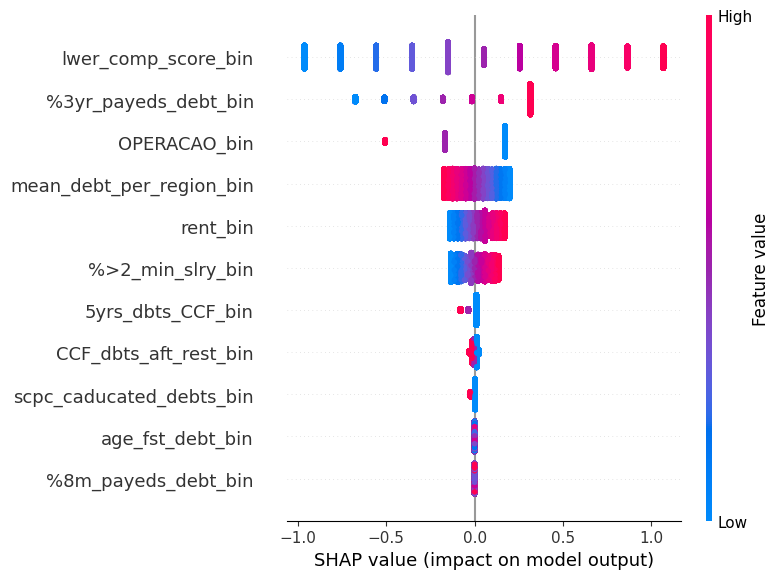

In [42]:
import shap
import warnings
warnings.filterwarnings("ignore")
for i, df in data_to_train.items():

    pipeline = dict_splits_models[i][0]   # tu pipeline
    X = df.drop(columns="risk")
    y = df["risk"]

    # Entrenar
    pipeline.fit(X, y)

    # Extraer partes del pipeline
    oversampler = pipeline.named_steps["oversampler"]
    model = pipeline.named_steps["model"]

    # Aplicar oversampling SOLO para SHAP
    X_res, y_res = oversampler.fit_resample(X, y)

    # SHAP explainer correcto para modelos lineales
    explainer = shap.LinearExplainer(
        model,
        X_res,
        feature_perturbation="interventional"
    )

    shap_values = explainer.shap_values(X_res)

    shap.summary_plot(shap_values, X_res)


<h3>Ensamble using Random Forest:</h3>

In [49]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


pipeline = Pipeline(steps=[

    ("model", RandomForestClassifier(random_state=42,n_jobs=-1))
])

# Espacio de búsqueda (aleatorio)
param_rf_ensambler = {
    "model__n_estimators": randint(100, 300),
    "model__max_depth": randint(3, 12),
    "model__min_samples_split": randint(5, 20),
    "model__min_samples_leaf": randint(3, 15),
    "model__max_features": ["sqrt", "log2"],
    'model__class_weight': ['balanced']}
# Random search
random_search_ensambler = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_rf_ensambler,
    n_iter=100,       
    cv=5,
    scoring="average_precision",
    random_state=42,
    n_jobs=-1,
    verbose=1
)



ensamble_dict2=ensamble_models(data_to_train,dict_splits_models,random_search_ensambler)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'model__class_weight': 'balanced', 'model__max_depth': 3, 'model__max_features': 'log2', 'model__min_samples_leaf': 4, 'model__min_samples_split': 12, 'model__n_estimators': 231}
0.93141464864202
Data frame,0:
score_f1: 0.81014865512882
accuracy: 0.7005020287463035
recall: 0.573444515715202
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'model__class_weight': 'balanced', 'model__max_depth': 3, 'model__max_features': 'log2', 'model__min_samples_leaf': 14, 'model__min_samples_split': 9, 'model__n_estimators': 136}
0.9315582965902547
Data frame,1:
score_f1: 0.8025938131178909
accuracy: 0.6888926118277768
recall: 0.5711864406779661
Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'model__class_weight': 'balanced', 'model__max_depth': 6, 'model__max_features': 'log2', 'model__min_samples_leaf': 4, 'model__min_samples_split': 14, 'model__n_estimators': 143}
0.859259428717
Data frame,2:
score_f1: 0

In [56]:
from sklearn.ensemble import RandomForestClassifier

dict_splits_models_ensambler = {
    0: RandomForestClassifier(
        class_weight='balanced',
        max_depth=3,
        max_features='log2',
        min_samples_leaf=4,
        min_samples_split=12,
        n_estimators=231,
        random_state=42,
        n_jobs=-1
    ),
    1: RandomForestClassifier(
        class_weight='balanced',
        max_depth=3,
        max_features='log2',
        min_samples_leaf=14,
        min_samples_split=9,
        n_estimators=136,
        random_state=42,
        n_jobs=-1
    ),
    2: RandomForestClassifier(
        class_weight='balanced',
        max_depth=6,
        max_features='log2',
        min_samples_leaf=4,
        min_samples_split=14,
        n_estimators=143,
        random_state=42,
        n_jobs=-1
    ),
    3: RandomForestClassifier(
        class_weight='balanced',
        max_depth=3,
        max_features='sqrt',
        min_samples_leaf=14,
        min_samples_split=13,
        n_estimators=277,
        random_state=42,
        n_jobs=-1
    )
}


In [57]:
ensamble_dict=ensamble_models(data_to_train,dict_splits_models,dict_splits_models_ensambler)

Data frame,0:
score_f1: 0.81014865512882
accuracy: 0.7005020287463035
recall: 0.573444515715202
Data frame,1:
score_f1: 0.8025938131178909
accuracy: 0.6888926118277768
recall: 0.5711864406779661
Data frame,2:
score_f1: 0.6172562048075044
accuracy: 0.5495889150807797
recall: 0.7793269230769231
Data frame,3:
score_f1: 0.691701244813278
accuracy: 0.5958112335101319
recall: 0.6578699340245052


<h3>For imbalnaced data like this, we use Precision-Recall curve. In our case we got a medium balanced in recall and precision. We will use the best treshhold calculed here in the next steps </h3>

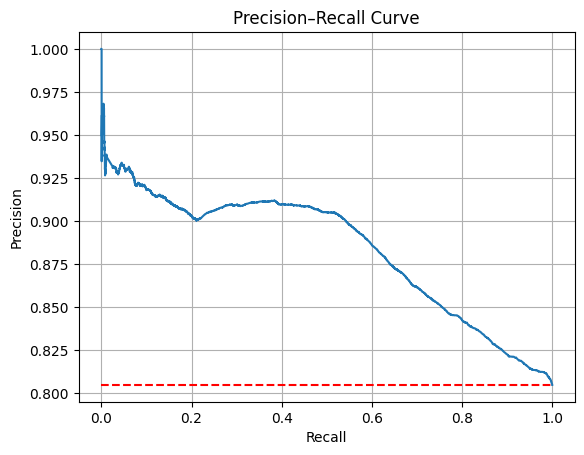

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
predicts=pd.DataFrame()
predicts_proba=pd.DataFrame()
test=pd.DataFrame()
for i,df in data_to_train.items():
    X=df.drop(columns='risk')
    y=df['risk']
    X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y)
    test=pd.concat([test,y_test])

    df_test=pd.DataFrame(data={
        'model_1_class_0': dict_splits_models[i][0].predict_proba(X_test)[:, 0],
        'model_1_class_1': dict_splits_models[i][0].predict_proba(X_test)[:, 1],
        'model_2_class_0': dict_splits_models[i][1].predict_proba(X_test)[:, 0],
        'model_2_class_1': dict_splits_models[i][1].predict_proba(X_test)[:, 1]})

    predict_i=pd.DataFrame(index=y_test.index,data=ensamble_dict[i].predict(df_test))
    predicts_proba_i=pd.DataFrame(index=y_test.index,data=ensamble_dict[i].predict_proba(df_test))

    predicts=pd.concat([predicts,predict_i])
    predicts_proba=pd.concat([predicts_proba,predicts_proba_i])
        


precision, recall, thresholds = precision_recall_curve(test, predicts_proba[1])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid()
baseline = test.mean()
plt.hlines(baseline, 0, 1, colors="red", linestyles="dashed")

plt.show()
f1=2*(precision*recall)/(precision+recall+ 1e-9)
best_threshold=thresholds[f1.argmax()]


Classification Report:

              precision    recall  f1-score   support

         0.0     0.2888    0.7199    0.4122     13652
         1.0     0.8937    0.5704    0.6964     56350

    accuracy                         0.5996     70002
   macro avg     0.5912    0.6452    0.5543     70002
weighted avg     0.7757    0.5996    0.6409     70002



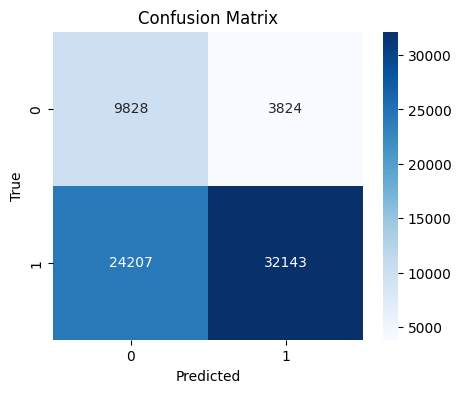

In [59]:

print("Classification Report:\n")
print(classification_report(test, predicts, digits=4))



cm = confusion_matrix(test, predicts)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

<h3>Class that predict using montecarlo bootstrap:</h3>

In [60]:
from sklearn.base import clone
import pandas as pd
import numpy as np

class final_model():
    def __init__(self, pipelines_dict, ensambler_dict):
        """
        pipelines_dict: diccionario con clave = i, 
                        valor = [modelo_base_0, modelo_base_1]
        ensambler_dict: diccionario con clave = i, valor = ensambler_model
        """
        self.pipelines_dict = pipelines_dict
        self.ensambler_dict = ensambler_dict
        self.trained_models_dict = {} 
        self.trained_ensamblers_dict = {}
        self.splits={'highst_time_pay': [255],'lwer_comp_score': [-1]}
        self.missing_values={'rent': [0],'age': [255],'1_energy_meter': [-1, -2, -3], '%>2_min_slry': [-1, -2, -3],'3yr_cpf_cons': [-1],
                                                                                              'age_fst_debt': [-1]}
        self.replace_values={'rent': {0: 1792, 1: 3346, 2: 1342, 3: 2442},'age': {0: 46, 1: 46, 2: 42, 3: 43},
                             '1_energy_meter': {0: 86, 1: 90, 2: 85, 3: 89},'%>2_min_slry': {0: 29, 1: 44, 2: 22, 3: 33},
                             '3yr_cpf_cons': {0: 0, 1: 1, 2: 0, 3: 1},'age_fst_debt': {2: 35, 3: 38}}
        
    def fit_iteration(self, X_train, y_train, i):
        """Entrena los modelos base de un pipeline"""

        model_clone_0 = clone(self.pipelines_dict[i][0])
        model_clone_1 = clone(self.pipelines_dict[i][1])
        model_clone_0.fit(X_train, y_train)
        model_clone_1.fit(X_train, y_train)
        return model_clone_0, model_clone_1
    
    def ensambler_iteration(self, model_0, model_1, X_train, y_train, i):
        """Entrena el ensambler usando las probabilidades de los modelos base"""
        df_probas = pd.DataFrame({
            'model_1_class_0': model_0.predict_proba(X_train)[:, 0],
            'model_1_class_1': model_0.predict_proba(X_train)[:, 1],
            'model_2_class_0': model_1.predict_proba(X_train)[:, 0],
            'model_2_class_1': model_1.predict_proba(X_train)[:, 1]
        })
        ensambler_clone = clone(self.ensambler_dict[i])
        ensambler_clone.fit(df_probas, y_train)
        return ensambler_clone
    
    def fit(self, data_to_train_dict):
        """
        data_to_train_dict: diccionario con clave = i,
                            valor = {'X_train': X_train, 'y_train': y_train}
        """
        for i, data in data_to_train_dict.items():
            X_train = data['X_train']
            y_train = data['y_train']
            
            model_0, model_1 = self.fit_iteration(X_train, y_train, i)
            self.trained_models_dict[i] = (model_0, model_1)
            
            self.trained_ensamblers_dict[i] = self.ensambler_iteration(
                model_0, model_1, X_train, y_train, i
            )
        return 

    def make_data_to_train_dict(self,X,y,splits_data_iv):
        X['risk']=y
        X_iv_dict=adapt_to_previous_bins(depurate_data(X,self.replace_values.copy(),self.missing_values.copy(),self.splits.copy()),splits_data_iv)
        train_dict={}

        for i,X_iv in X_iv_dict.items():
            train_dict[i]={'X_train':X_iv.drop(columns='risk'),'y_train':X_iv['risk']}

        return train_dict
        
        
    def montecarlo_bootstrap(self, X, y, X_2 ,splits_data_iv, n_iter=10, threshold=0.5):
        """
        Montecarlo bootstrap usando el ensambler final del pipeline.
        """
        predictions = []

        
        for i in range(n_iter):
            # Bootstrap
            X_train_bootstrap = X.sample(frac=1, replace=True)
            y_train_bootstrap = y.loc[X_train_bootstrap.index]

            train_dict=self.make_data_to_train_dict(X_train_bootstrap,y_train_bootstrap,splits_data_iv)
            try:
                self.fit(train_dict)
            except:
                continue
        
            X_2_dict=adapt_to_previous_bins(depurate_data(X_2,self.replace_values.copy(),self.missing_values.copy(),self.splits.copy()),splits_data_iv)
            
            predict_class_1=self.predict_proba(X_2_dict)[1]
            predictions.append(predict_class_1)


        predictions = np.array(predictions)
        mean_pred = predictions.mean(axis=0)
        std_pred = predictions.std(axis=0)
        
        return pd.DataFrame(index=predict_class_1.index,data={'mean':mean_pred,'std':std_pred,'IND_BOM':np.where(mean_pred > threshold, 1, 0)})


    def predict_proba(self, X_2_dict):
        predicts_proba=pd.DataFrame()
        for i,df in X_2_dict.items():
            
            df_probas = pd.DataFrame({
                'model_1_class_0': self.trained_models_dict[i][0].predict_proba(df)[:, 0],
                'model_1_class_1': self.trained_models_dict[i][0].predict_proba(df)[:, 1],
                'model_2_class_0': self.trained_models_dict[i][1].predict_proba(df)[:, 0],
                'model_2_class_1': self.trained_models_dict[i][1].predict_proba(df)[:, 1]
                })
            
            predicts_proba_i=pd.DataFrame(index=df.index,data=self.trained_ensamblers_dict[i].predict_proba(df_probas))

            predicts_proba=pd.concat([predicts_proba,predicts_proba_i])
        return predicts_proba



In [61]:
import warnings
warnings.filterwarnings("ignore")
model=final_model(dict_splits_models,ensamble_dict)
df_metrics=model.montecarlo_bootstrap(data.drop(columns='risk'), data['risk'], data.drop(columns='risk') ,splits_data_iv, n_iter=30, threshold=0.5)

<h3>Histogram with the best threshold</h3>

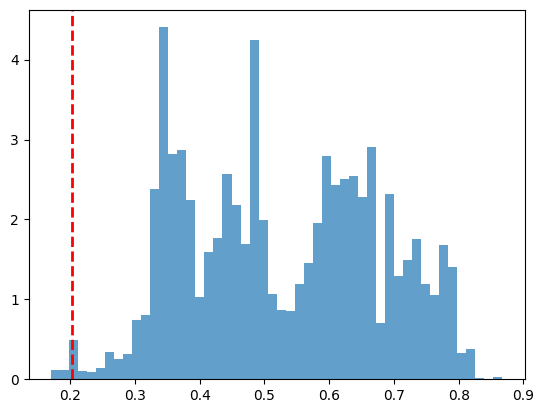

In [65]:
import matplotlib.pyplot as plt
plt.hist(df_metrics['mean'], bins=50, density=True, alpha=0.7)
plt.axvline(x=best_threshold, color='red', linestyle='--', linewidth=2)
plt.show()

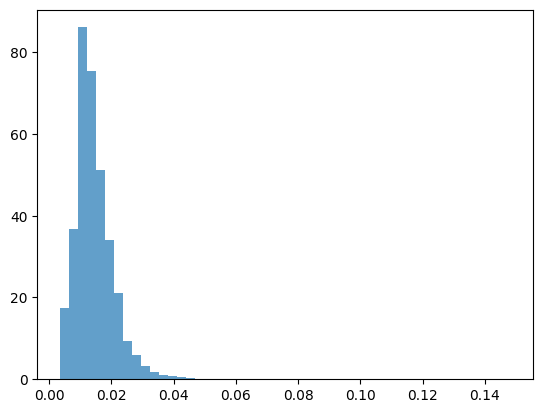

In [66]:
import matplotlib.pyplot as plt

plt.hist(df_metrics['std'], bins=50, density=True, alpha=0.7)
plt.show()


In [67]:
df_metrics['risk']=data['risk']

In [71]:
preds_montecarlo= np.where(df_metrics['mean'] > best_threshold, 1, 0)
y_test=data['risk']
from sklearn.metrics import accuracy_score, recall_score, f1_score, balanced_accuracy_score
print('Metricas Montecarlo para no_prev_debts')
print(f'score_f1: {f1_score(y_test,preds_montecarlo)}')
print(f'accuracy: {accuracy_score(y_test,preds_montecarlo)}')
print(f'recall: {recall_score(y_test,preds_montecarlo, pos_label=0)}')

Metricas Montecarlo para no_prev_debts
score_f1: 0.8898317595013262
accuracy: 0.8017
recall: 0.004424389815113247


<h3>For test set in kaggle: </h3>

In [176]:
test=pd.read_csv('test_data.csv',index_col='ID')
test

,DATA_CONSULTA,OPERACAO,VP67,VP119,VP134,VP135,VP142,VP153,VP157,VPCMS0008,...,VPDCS0050,VP169,VPGEO0040,VPDCR0027,VP176,VP184,VP59_146,VP144_C,CLIENT_ID,IND_BOM
ID,,,,,,,,,,,,,,,,,,,,,
350001,11/02/2016,1,8,100,519,60,100,1,0,2729,...,30,0,241,65,24,0,-2,0,338047,NaN
350002,29/09/2016,2,0,100,-1,17,100,1,0,1058,...,7,0,315,65,24,0,-3,-99,338048,NaN
350003,24/02/2016,1,0,-1,-1,255,-1,0,-1,1335,...,9,0,375,65,0,0,-3,-99,338049,NaN
350004,30/06/2016,1,0,-1,-1,255,-1,0,-1,3417,...,57,0,146,65,0,2,-1,0,338050,NaN
350005,30/09/2016,1,0,50,400,1,-1,1,1,761,...,47,0,211,65,26,2,-1,0,338051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,23/01/2016,1,0,-1,-1,255,-1,0,-1,1115,...,15,0,267,74,0,2,-1,0,483046,NaN
499997,30/06/2016,3,0,-1,-1,255,-1,0,-1,4588,...,76,0,133,65,0,3,-1,0,483047,NaN
499998,04/07/2016,2,0,-1,729,255,-1,0,0,529,...,11,0,398,65,0,-1,-1,0,483048,NaN


In [177]:
test.rename(columns=dict_col_names,inplace=True)
test

,DATA_CONSULTA,OPERACAO,scpc_caducated_debts,%3yr_payeds_debt,lwer_comp_score,highst_time_pay,%8m_payeds_debt,1yr_comp_debt,comp_type,rent,...,%>2_min_slry,new_cfp,mean_debt_per_region,%hmes_wbath,age_fst_debt,3yr_cpf_cons,CCF_dbts_aft_rest,5yrs_dbts_CCF,CLIENT_ID,risk
ID,,,,,,,,,,,,,,,,,,,,,
350001,11/02/2016,1,8,100,519,60,100,1,0,2729,...,30,0,241,65,24,0,-2,0,338047,NaN
350002,29/09/2016,2,0,100,-1,17,100,1,0,1058,...,7,0,315,65,24,0,-3,-99,338048,NaN
350003,24/02/2016,1,0,-1,-1,255,-1,0,-1,1335,...,9,0,375,65,0,0,-3,-99,338049,NaN
350004,30/06/2016,1,0,-1,-1,255,-1,0,-1,3417,...,57,0,146,65,0,2,-1,0,338050,NaN
350005,30/09/2016,1,0,50,400,1,-1,1,1,761,...,47,0,211,65,26,2,-1,0,338051,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499996,23/01/2016,1,0,-1,-1,255,-1,0,-1,1115,...,15,0,267,74,0,2,-1,0,483046,NaN
499997,30/06/2016,3,0,-1,-1,255,-1,0,-1,4588,...,76,0,133,65,0,3,-1,0,483047,NaN
499998,04/07/2016,2,0,-1,729,255,-1,0,0,529,...,11,0,398,65,0,-1,-1,0,483048,NaN


In [178]:
test['CLIENT_OPERATIONS']=test.groupby('CLIENT_ID')['CLIENT_ID'].transform('count')
test.drop(columns='CLIENT_ID',inplace=True)
test['DATA_CONSULTA']=pd.to_datetime(test['DATA_CONSULTA'],dayfirst=True)
test['DATA_CONSULTA']=test['DATA_CONSULTA'].astype("int64") // 10**9

In [251]:
import warnings
warnings.filterwarnings("ignore")
model_to_test=final_model(dict_splits_models,ensamble_dict)
df_metrics=model_to_test.montecarlo_bootstrap(data.drop(columns='risk'), data['risk'], test.drop(columns='risk') ,splits_data_iv, n_iter=100,threshold=best_threshold)

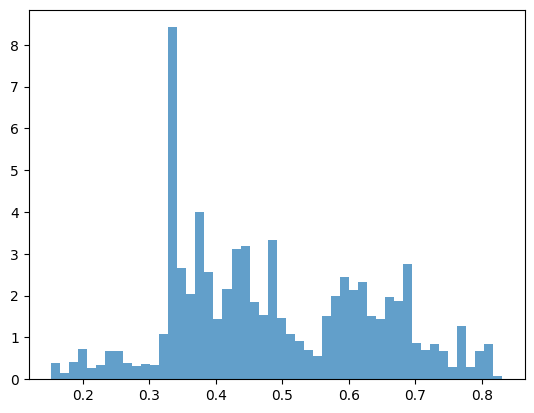

In [252]:
import matplotlib.pyplot as plt
plt.hist(df_metrics['mean'], bins=50, density=True, alpha=0.7)
plt.show()

In [253]:

df_metrics.rename({'prediction':'IND_BOM'}, axis=1, inplace=True)


In [254]:
df_metrics['IND_BOM'].value_counts()

IND_BOM
1    147430
0      2570
Name: count, dtype: int64

In [255]:
df_metrics

,mean,std,IND_BOM
ID,,,
350003,0.527765,0.041560,1
350004,0.647960,0.024776,1
350010,0.591226,0.050039,1
350017,0.584874,0.023911,1
350021,0.583674,0.022351,1
...,...,...,...
499980,0.504469,0.036399,1
499988,0.789442,0.025088,1
499991,0.522743,0.019632,1


In [256]:
df_metrics.drop(columns=['mean','std']).sort_index().to_csv('predictions.csv')